In [1]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
cat4 = cv2.imread('C:/7-Computer_Vision/PetImages/Cat/4.jpg')
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)

In [3]:
cat4.shape

(375, 500, 3)

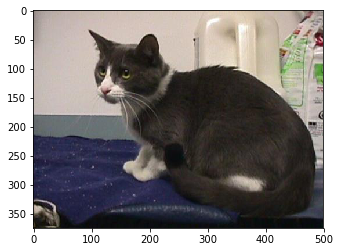

In [4]:
plt.imshow(cat4)

In [5]:
dog2 = cv2.imread('C:/7-Computer_Vision/PetImages/Dog/2.jpg')
dog2 = cv2.cvtColor(dog2, cv2.COLOR_BGR2RGB)

In [6]:
dog2.shape

(199, 188, 3)

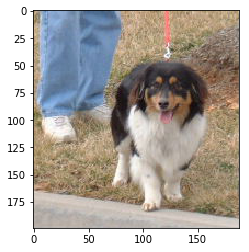

In [7]:
plt.imshow(dog2)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [12]:
images_gen = ImageDataGenerator(rotation_range=30, #rotate the shape 30 degree
                               width_shift_range=0.1,#Shift the pic width by max 
                               height_shift_range=0.1, #Shift the pic width by max
                               rescale=1/255,#Rescale the image by normalizing it.
                               shear_range=0.2,#Shear means cutting away part
                               zoom_range=0.2,#zoom it by 20%
                               horizontal_flip=True, #Allow horizonal fliping
                               fill_mode='nearest' #Fill the missing pixel with the nearest
                )

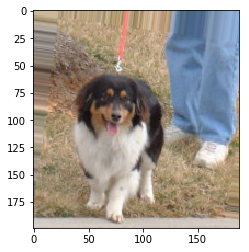

In [13]:
plt.imshow(image_gen.random_transform(dog2))

In [14]:
image_gen.flow_from_directory('C:/7-Computer_Vision/PetImages/train')

Found 0 images belonging to 0 classes.


In [15]:
image_gen.flow_from_directory('C:/7-Computer_Vision/PetImages/test')

Found 0 images belonging to 0 classes.


Resizing Images

Let's have Keras resize all the images to 150 pixels by 150 pixels once they've manipulated.

In [17]:
# width, height, channels
image_shape = (150, 150, 3)

Creating a model

In [19]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (150, 150, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = (150, 150, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = (150, 150, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

In [ ]:
model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfittig by randomly turning neurons off during training
# Here we say randomly turn off 50% of neurons
model.add(Dropout(0.5))

# Last Layer, remember its binary, 0 = cat, 1 = dog 
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizers = 'adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Training the model

In [ ]:
batch_size = 16
train_image_gen = image_gen.flow_from_directory('C:/7-Computer_Vision/PetImages/train', target_size = image_shape[:2], batch-size = batch_size, class_mode = 'binary')
'''
image)gen is likely an instance of the 
'''

In [ ]:
test_image_gen = image_gen.flow_from_directory('C:/7-Computer_Vision/PetImages/test', target_size = image_shape[:2], batch-size = batch_size, class_mode = 'binary')

In [ ]:
train_image_gen.class_indices

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
results = model.fit_generator(train_image_gen, epochs = 10, steps_per_epoch = 15, validation_data = test_image_gen, validation_steps = 12)

Evaluating the model

In [ ]:
results.history['acc']

In [ ]:
plt.plot(results.history['acc'])